In [ ]:
# model built by dropping the duplicated values


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank.xlsx to bank (2).xlsx


In [ ]:
df=pd.read_excel("bank.xlsx")

In [ ]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
industrial_risk,250.0,0.518,0.411526,0.0,0.0,0.5,1.0,1.0
management_risk,250.0,0.614,0.410705,0.0,0.5,0.5,1.0,1.0
financial_flexibility,250.0,0.376,0.401583,0.0,0.0,0.5,0.5,1.0
credibility,250.0,0.470,0.415682,0.0,0.0,0.5,1.0,1.0
competitiveness,250.0,0.476,0.440682,0.0,0.0,0.5,1.0,1.0
operating_risk,250.0,0.570,0.434575,0.0,0.0,0.5,1.0,1.0


In [ ]:
df[df.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
duplicates = df[df.duplicated(keep=False)]
duplicates


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
df=df.drop_duplicates()

In [ ]:
print(df.isnull().sum())

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [ ]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [ ]:
class_count=df['class'].value_counts()
class_count

non-bankruptcy    78
bankruptcy        25
Name: class, dtype: int64

<BarContainer object of 2 artists>

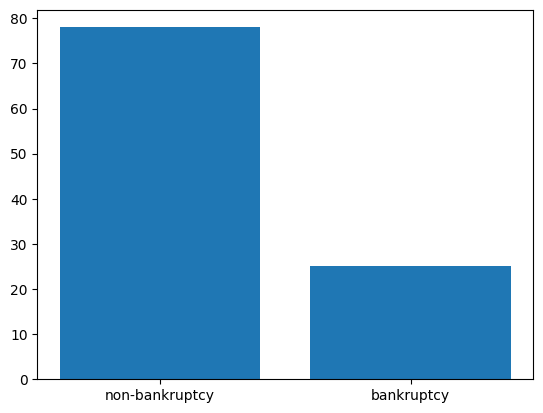

In [ ]:
plt.bar(class_count.index, class_count)

0.5    36
0.0    35
1.0    32
Name: industrial_risk, dtype: int64
1.0    42
0.5    32
0.0    29
Name: management_risk, dtype: int64
0.5    36
1.0    34
0.0    33
Name: financial_flexibility, dtype: int64
0.5    42
1.0    39
0.0    22
Name: credibility, dtype: int64
1.0    53
0.5    26
0.0    24
Name: competitiveness, dtype: int64
1.0    41
0.0    38
0.5    24
Name: operating_risk, dtype: int64
non-bankruptcy    78
bankruptcy        25
Name: class, dtype: int64


<Axes: ylabel='operating_risk'>

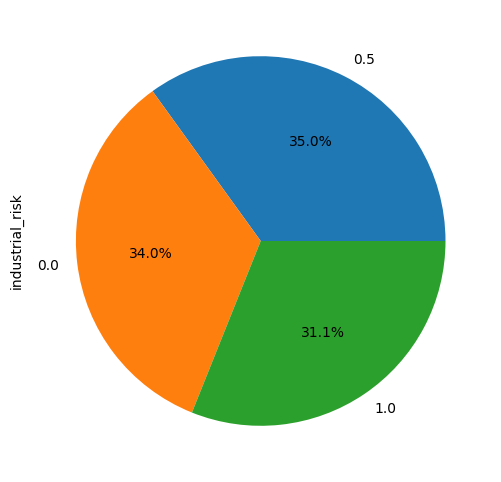

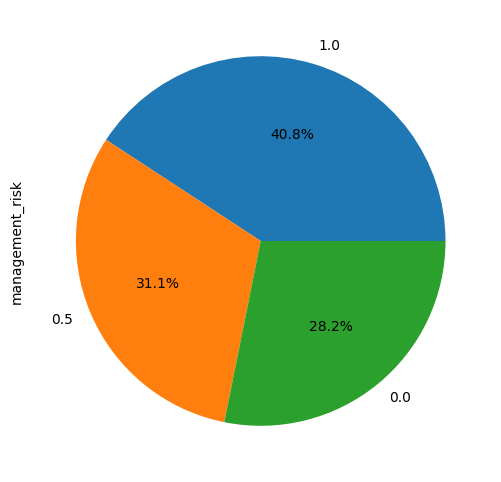

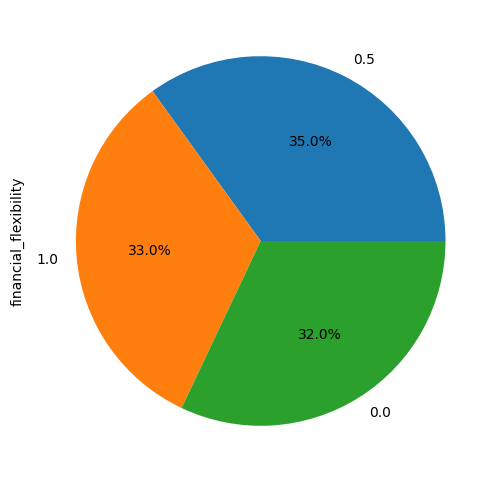

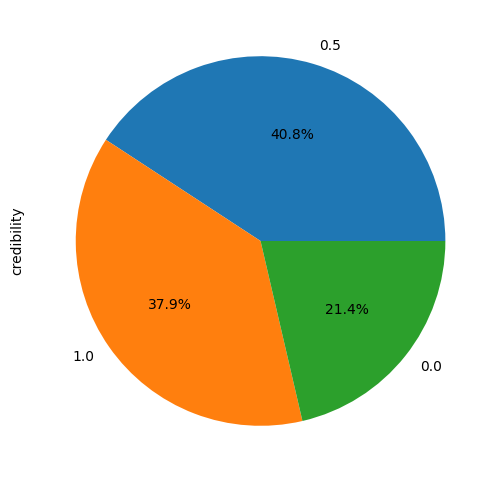

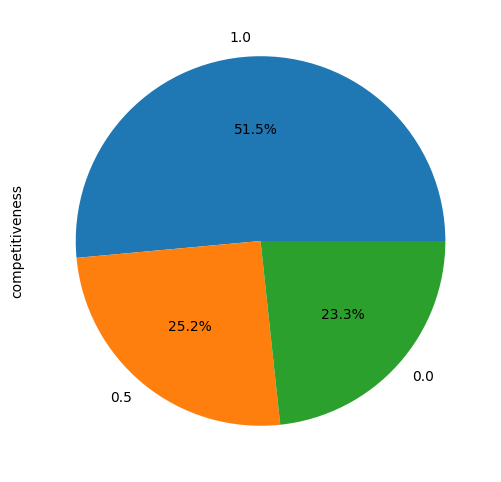

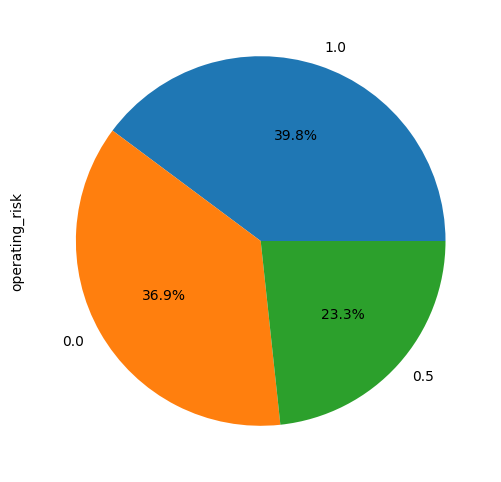

In [ ]:
#Checking value counts of all features
print(df['industrial_risk'].value_counts())
print(df['management_risk'].value_counts())
print(df['financial_flexibility'].value_counts())
print(df['credibility'].value_counts())
print(df['competitiveness'].value_counts())
print(df['operating_risk'].value_counts())
print(df['class'].value_counts())
#Checking value counts of all features

plt.figure(figsize=(15,6))
df['industrial_risk'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

plt.figure(figsize = (15,6))
df['management_risk'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

plt.figure(figsize = (15,6))
df['financial_flexibility'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

plt.figure(figsize = (15,6))
df['credibility'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

plt.figure(figsize = (15,6))
df['competitiveness'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

plt.figure(figsize = (15,6))
df['operating_risk'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

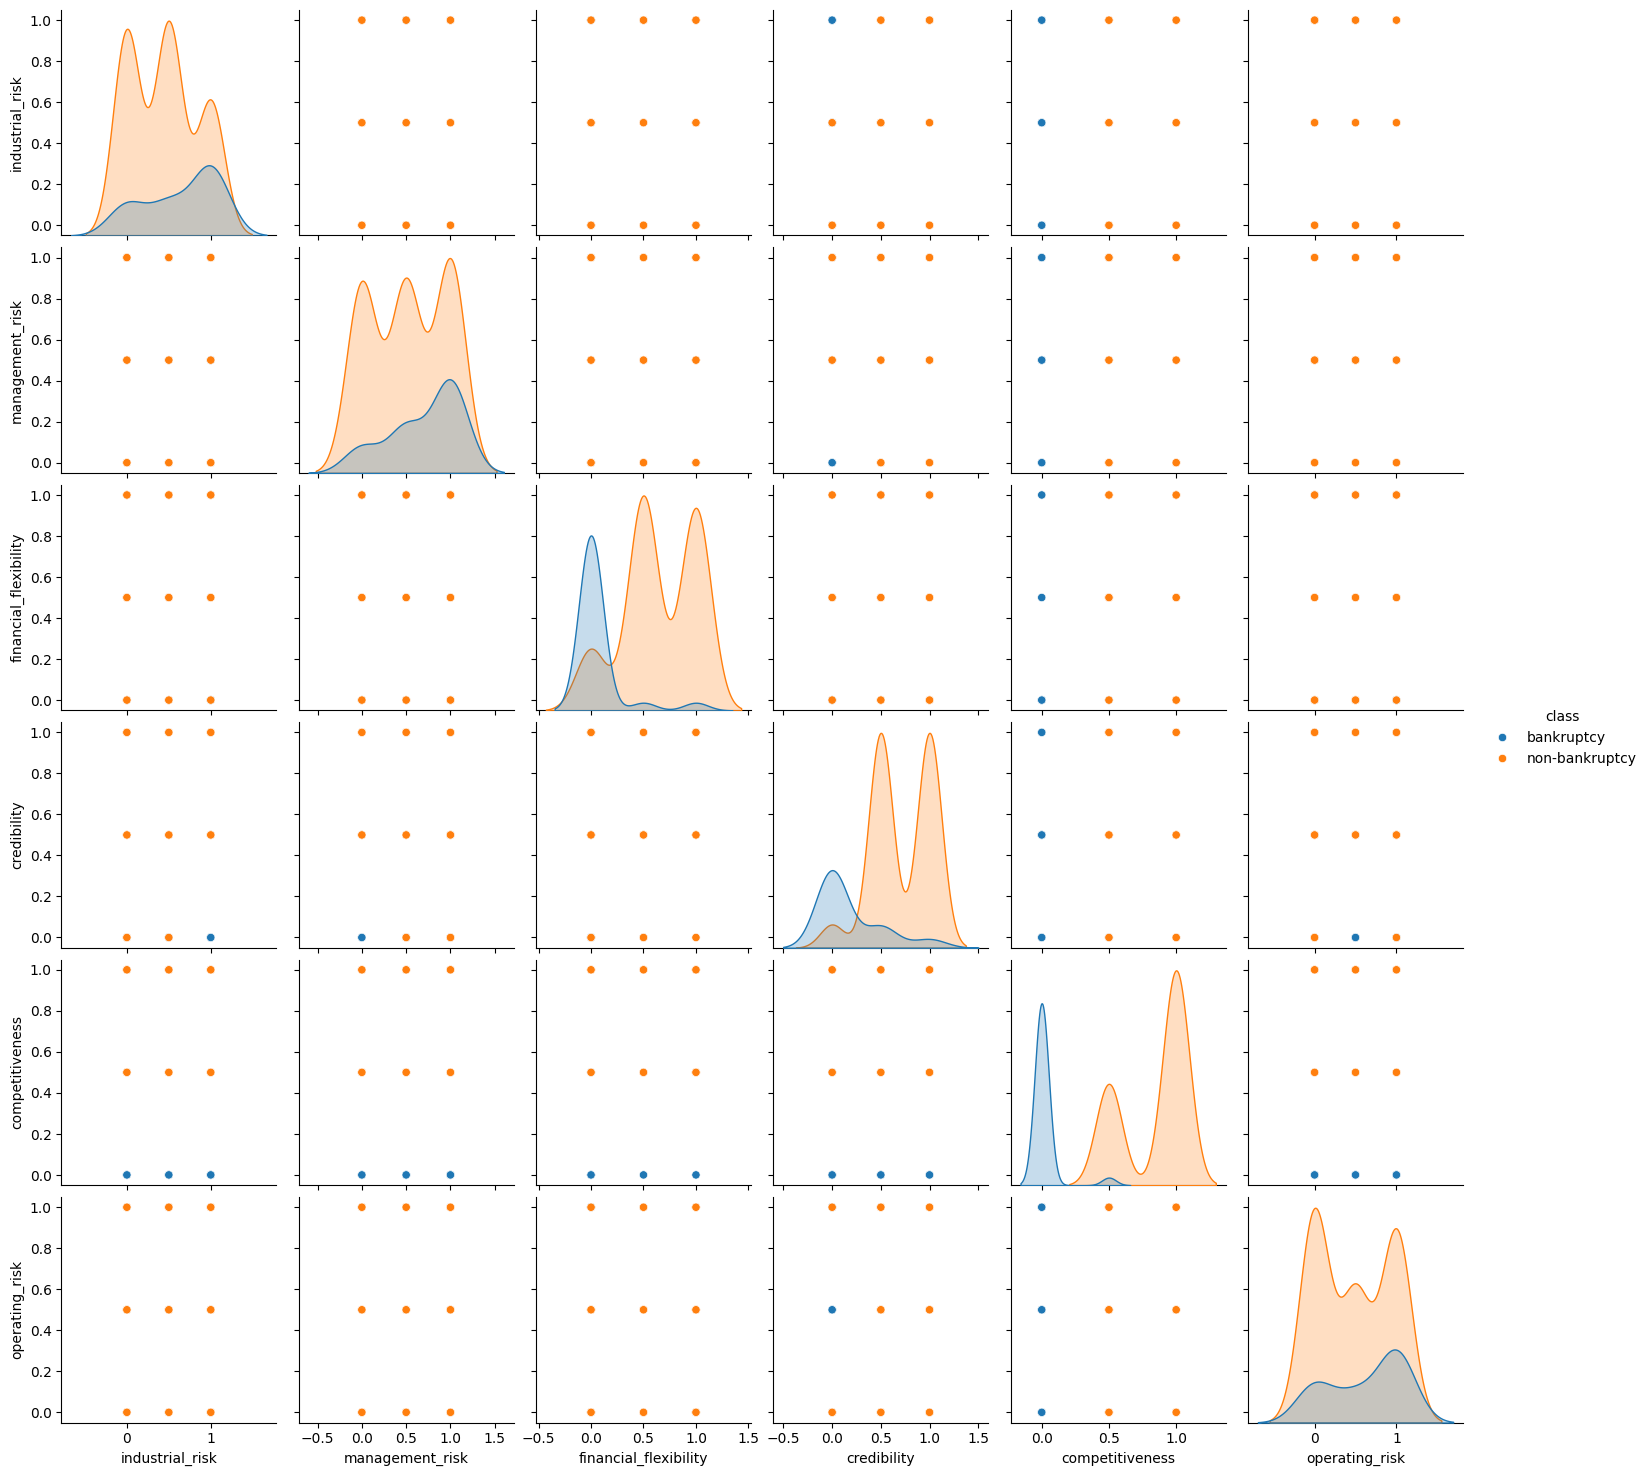

In [ ]:
sns.pairplot(df, hue='class', diag_kind='kde')
plt.show()

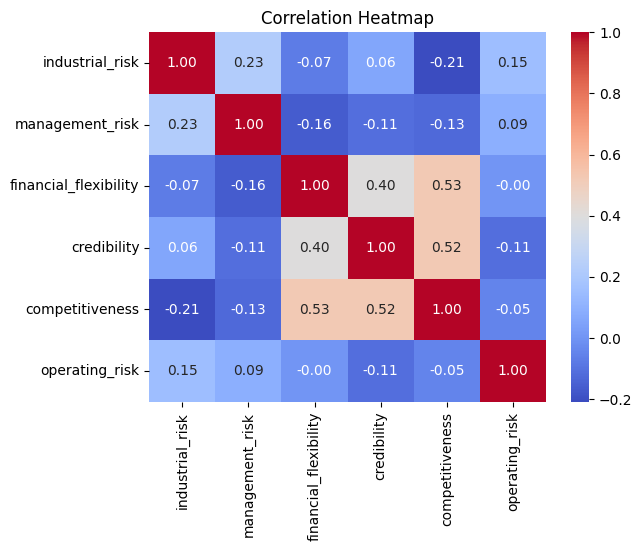

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

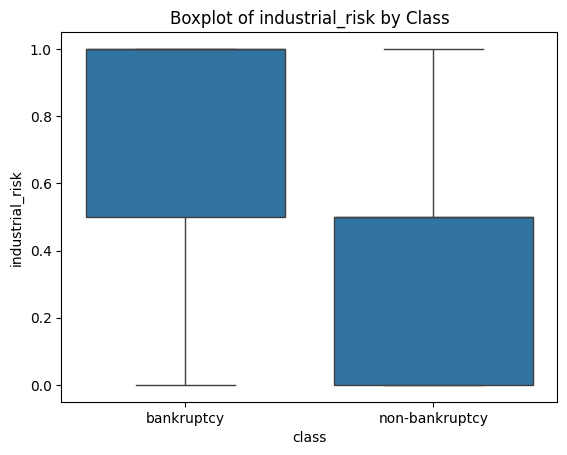

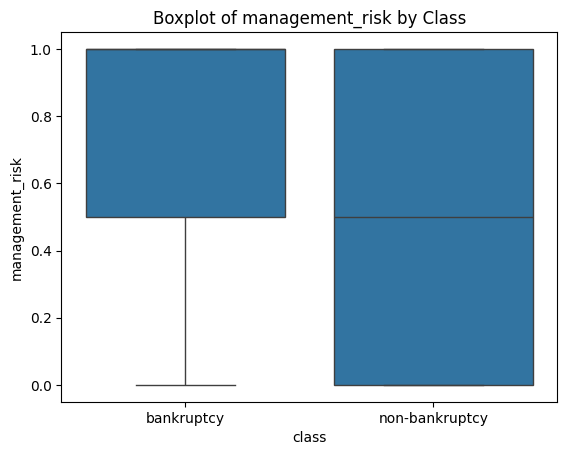

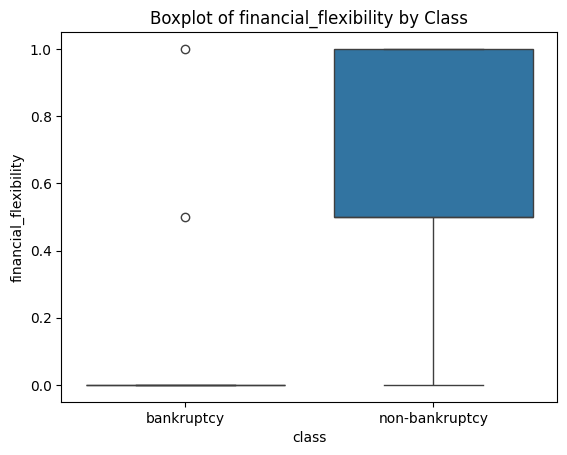

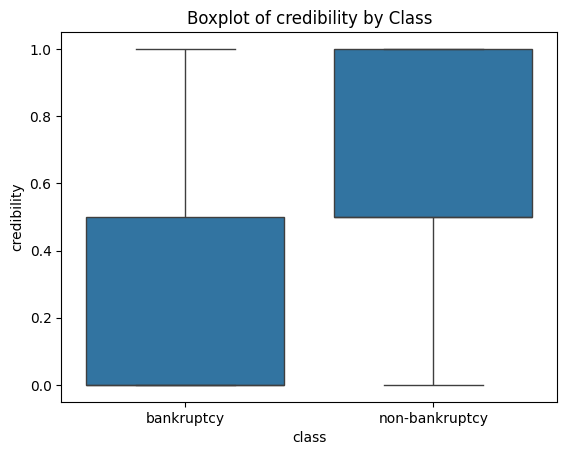

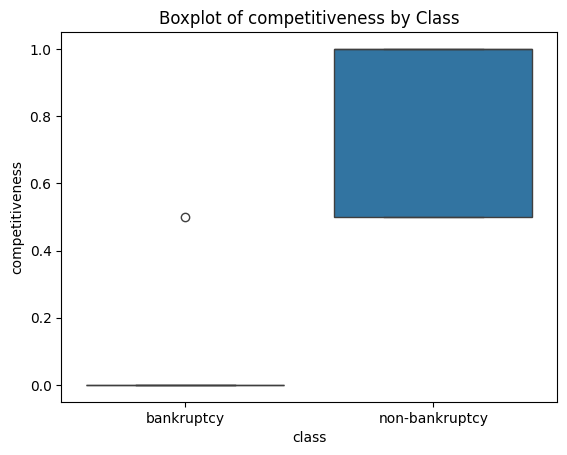

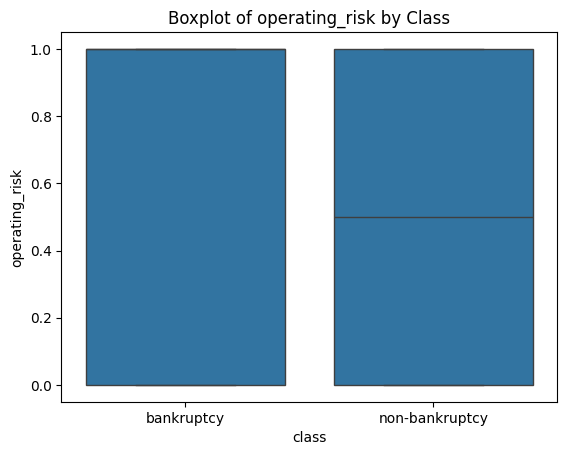

In [ ]:
for column in df.columns[:-1]:
    sns.boxplot(x='class', y=column, data=df)
    plt.title(f'Boxplot of {column} by Class')
    plt.show()

<Axes: xlabel='industrial_risk', ylabel='count'>

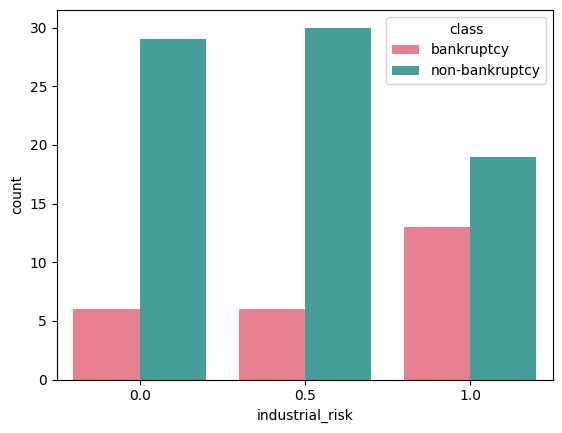

In [ ]:
sns.countplot(x = 'industrial_risk',hue = 'class' ,palette = 'husl', data = df)

<Axes: xlabel='management_risk', ylabel='count'>

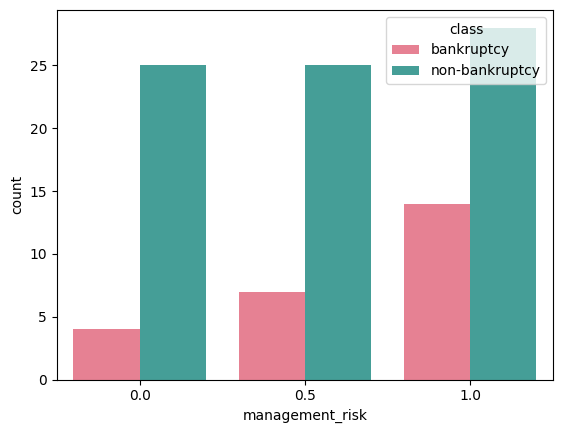

In [ ]:
sns.countplot(x = 'management_risk',hue = 'class' ,palette = 'husl', data = df)

<Axes: xlabel='financial_flexibility', ylabel='count'>

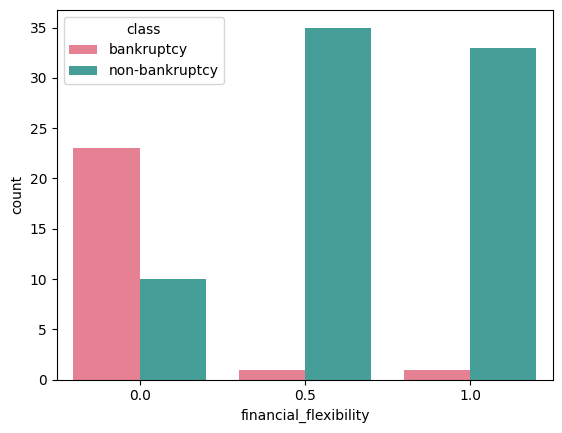

In [ ]:
sns.countplot(x = 'financial_flexibility',hue = 'class' ,palette = 'husl', data = df)

<Axes: xlabel='credibility', ylabel='count'>

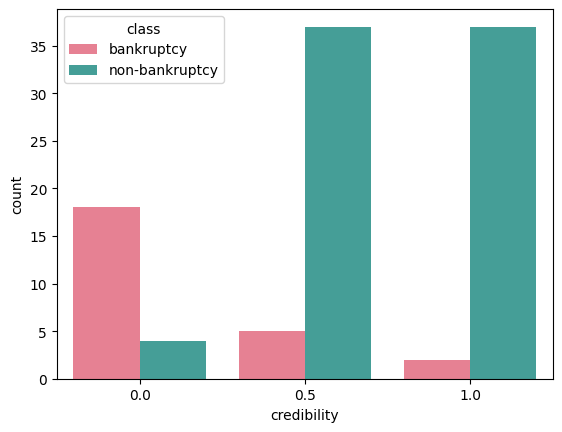

In [ ]:
sns.countplot(x = 'credibility',hue = 'class' ,palette = 'husl', data = df)

<Axes: xlabel='competitiveness', ylabel='count'>

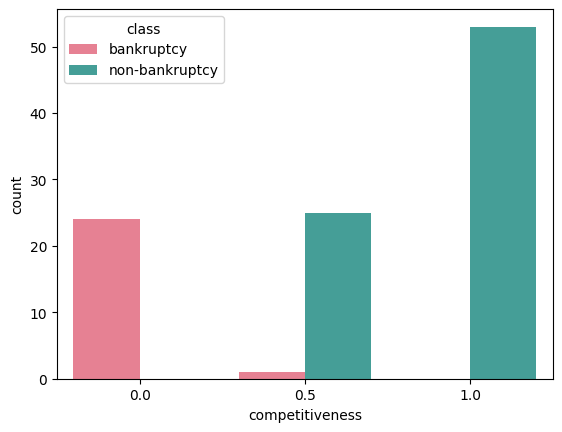

In [ ]:
sns.countplot(x = 'competitiveness',hue = 'class' ,palette = 'husl', data = df)

<Axes: xlabel='operating_risk', ylabel='count'>

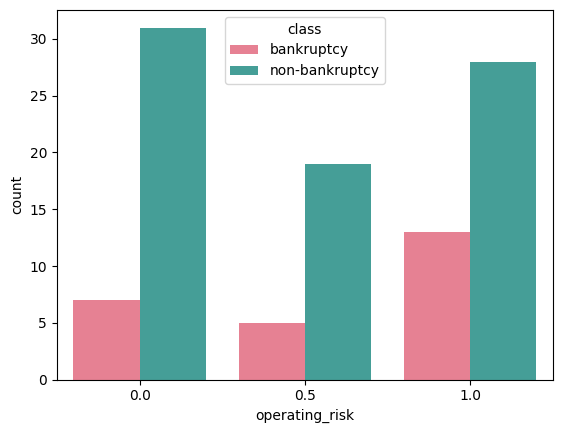

In [ ]:
sns.countplot(x = 'operating_risk',hue = 'class' ,palette = 'husl', data = df)

with this we conclude that, if the INDUSTIRIAL_RISK, MANAGEMENT_RISK==1.0 AND FINANCIAL , CREDIBILITY AND COMPITITIVE_RISK ==0 AND OPERATIONAL_RISK==1 ,
this results the more chance of the bankruptcy....


<Axes: ylabel='class'>

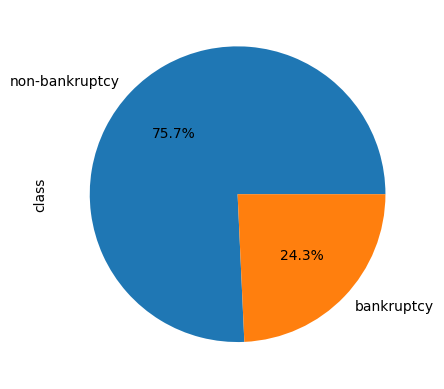

In [ ]:
df['class'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

In [ ]:
classwise_stats = df.groupby('class').mean()
print("Class-wise Statistics:\n", classwise_stats)


Class-wise Statistics:
                 industrial_risk  management_risk  financial_flexibility  \
class                                                                     
bankruptcy             0.640000         0.700000               0.060000   
non-bankruptcy         0.435897         0.519231               0.647436   

                credibility  competitiveness  operating_risk  
class                                                         
bankruptcy         0.180000         0.020000        0.620000  
non-bankruptcy     0.711538         0.839744        0.480769  


In [ ]:
from scipy.stats import pointbiserialr

binary_class = df['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})
correlation_with_target = {}
for column in df.columns[:-1]:
    correlation, _ = pointbiserialr(binary_class, df[column])
    correlation_with_target[column] = correlation
print("Point-Biserial Correlation with Target Variable:\n", correlation_with_target)


Point-Biserial Correlation with Target Variable:
 {'industrial_risk': 0.2171316475274671, 'management_risk': 0.1888865735086056, 'financial_flexibility': -0.6245730462903115, 'credibility': -0.6063503423440426, 'competitiveness': -0.8598094479107414, 'operating_risk': 0.13639255860346103}


converting the categorical column to numerical i,e class column

bankruptcy will be replaced by value 1

and non-bankruptcy will be replaced by value 0

In [ ]:
df['class'] = df['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_train',y_test.shape)

X_train (82, 6)
X_test (21, 6)
y_train (82,)
y_train (21,)


In [ ]:
y_train

136    0
36     1
151    0
127    0
185    0
      ..
154    0
19     1
179    0
134    0
194    0
Name: class, Length: 82, dtype: int64

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[ 1.24013105, -1.37826943,  1.21007674,  1.11219597,  0.86642996,
         1.13192314],
       [ 1.24013105,  1.0522272 , -1.21007674,  1.11219597, -1.54195163,
        -1.13192314],
       [ 1.24013105,  1.0522272 ,  1.21007674, -0.2489991 ,  0.86642996,
        -1.13192314],
       [ 0.02952693, -0.16302112,  1.21007674, -0.2489991 , -0.33776083,
         0.        ],
       [-1.18107719, -0.16302112, -1.21007674, -0.2489991 ,  0.86642996,
         0.        ],
       [-1.18107719,  1.0522272 , -1.21007674, -1.61019417, -1.54195163,
        -1.13192314],
       [ 0.02952693, -1.37826943,  1.21007674, -0.2489991 ,  0.86642996,
        -1.13192314],
       [ 1.24013105,  1.0522272 ,  0.        ,  1.11219597, -0.33776083,
         1.13192314],
       [ 1.24013105,  1.0522272 , -1.21007674, -0.2489991 , -1.54195163,
         1.13192314],
       [ 0.02952693, -0.16302112,  0.        ,  1.11219597,  0.86642996,
        -1.13192314],
       [ 0.02952693,  1.0522272 , -1.21007674, -1.

In [ ]:
models={
    " LogisticRegression": LogisticRegression(),
    "K-nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree":  DecisionTreeClassifier(),
    "SVM(Linear_Kernal)":LinearSVC(),
    "SVM(RBF_Kernal)":SVC(),
    "Neural_network": MLPClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()

}

In [ ]:
for name, model in models.items():
  model.fit(X_train_scaled,y_train)
  print(name + ' Trained')

 LogisticRegression Trained
K-nearest Neighbors Trained
Decision Tree Trained
SVM(Linear_Kernal) Trained
SVM(RBF_Kernal) Trained
Neural_network Trained
RandomForest Trained
GradientBoosting Trained


In [ ]:
results=[]
for name, model in models.items():
  result=model.score(X_test_scaled,y_test)
  results.append(result)
  print(name + ": {:.2f}% \n".format(result*100))

 LogisticRegression: 95.24% 

K-nearest Neighbors: 100.00% 

Decision Tree: 95.24% 

SVM(Linear_Kernal): 95.24% 

SVM(RBF_Kernal): 95.24% 

Neural_network: 100.00% 

RandomForest: 95.24% 

GradientBoosting: 95.24% 



In [ ]:
y_test.value_counts()

0    16
1     5
Name: class, dtype: int64

In [ ]:
y_test.value_counts()/len(y_test)

0    0.761905
1    0.238095
Name: class, dtype: float64

In [ ]:
#PCA method

In [ ]:
n_components=4
pca=PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced=pd.DataFrame(pca.transform(X_train),index=X_train.index,columns=['pc'+str(i) for i in range(1,n_components+1)])

X_test_reduced=pd.DataFrame(pca.transform(X_test),index=X_test.index,columns=['pc'+str(i) for i in range(1,n_components+1)])

In [ ]:
X_train_reduced

,pc1,pc2,pc3,pc4
136,-0.683523,0.566797,0.333106,0.686438
36,0.643966,0.194341,-0.855188,0.162927
151,-0.357524,0.162125,-0.797184,-0.015366
127,-0.172076,-0.023183,0.025798,0.076021
185,0.015485,-0.346603,0.273731,-0.310204
...,...,...,...,...
154,-0.764275,0.274789,0.544554,0.385082
19,0.873885,-0.537874,0.366508,-0.226523
179,-0.597915,-0.615457,-0.135550,-0.233910
134,0.146144,0.175697,0.389718,-0.678048


In [ ]:
X_train_reduced.describe()

,pc1,pc2,pc3,pc4
count,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01
mean,-6.769653e-19,4.197185e-17,-3.994095e-17,-3.249433e-17
std,5.742722e-01,4.528230e-01,4.388394e-01,3.858731e-01
min,-8.985703e-01,-8.630200e-01,-8.906458e-01,-6.846106e-01
25%,-4.389246e-01,-3.248120e-01,-2.933411e-01,-3.209049e-01
50%,-1.273497e-01,-1.566996e-02,-2.331430e-02,2.643024e-02
75%,2.858327e-01,2.780848e-01,3.099280e-01,2.102366e-01
max,1.114275e+00,9.539264e-01,9.783841e-01,8.696455e-01


In [ ]:
fig=px.bar(
    x=['PC'+ str(i) for i in range(1,n_components+1)],
    y=pca.explained_variance_ratio_,
    labels={'x':'Principal component','y': 'varience Ratio'},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0,'lightblue'),(1,'darkblue')],
    title='proportion of varience in Principle Components'
)
fig.show()

In [ ]:
Reduced_models={
    " LogisticRegression": LogisticRegression(),
    "K-nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree":  DecisionTreeClassifier(),
    "SVM(Linear_Kernal)":LinearSVC(),
    "SVM(RBF_Kernal)":SVC(),
    "Neural_network": MLPClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()

}

In [ ]:
for name, model in Reduced_models.items():
  model.fit(X_train_reduced,y_train)
  print(name + ' Trained')

 LogisticRegression Trained
K-nearest Neighbors Trained
Decision Tree Trained
SVM(Linear_Kernal) Trained
SVM(RBF_Kernal) Trained
Neural_network Trained
RandomForest Trained
GradientBoosting Trained


In [ ]:
reduced_results=[]
for name, model in Reduced_models.items():
  result=model.score(X_test_reduced,y_test)
  reduced_results.append(result)
  print(name + ": {:.2f}% \n".format(result*100))

 LogisticRegression: 100.00% 

K-nearest Neighbors: 100.00% 

Decision Tree: 100.00% 

SVM(Linear_Kernal): 100.00% 

SVM(RBF_Kernal): 100.00% 

Neural_network: 95.24% 

RandomForest: 100.00% 

GradientBoosting: 100.00% 



*The accuracy of all model are performing good with the PCA method .. compared to the Standard scaler method...*

In [ ]:
fig=px.bar(
    x=np.subtract(reduced_results,results),
    y=models.keys(),
    orientation='h',
    labels={'x':" change in performance",'y':'Model'},
    color=np.subtract(reduced_results,results),
    color_continuous_scale=[(0,'red'),(1,'blue')],
    title='change in Model Performance after dimensionality Reduction'

)
fig.show()

**The above figure describes the comparision between the standard_scaler and the PCA **

before dimensionality reduction ( standard_scaler method)


---


LogisticRegression: 95.24%

K-nearest Neighbors: 100.00%

Decision Tree: 95.24%

SVM(Linear_Kernal): 95.24%

SVM(RBF_Kernal): 95.24%

Neural_network: 100.00%

RandomForest: 95.24%

GradientBoosting: 95.24%

---


---




After the dimensionality reduction (PCA method)


---



LogisticRegression: 100.00%

K-nearest Neighbors: 100.00%

Decision Tree: 95.24%

SVM(Linear_Kernal): 100.00%

SVM(RBF_Kernal): 100.00%

Neural_network: 95.24%

RandomForest: 100.00%

GradientBoosting: 100.00%

------


 models like Logistic Regression, SVM with Linear Kernel, Random Forest, and Gradient Boosting seem to perform well both before and after dimensionality reduction. Considering a balance between performance, interpretability, and computational resources, Logistic Regression or SVM with Linear Kernel could be good choices for deployment. They are generally interpretable and computationally efficient, and they perform well

In [ ]:
#DEPLOYMENT

In [165]:
model = LogisticRegression()

In [166]:
model.fit(X_train, y_train)

LogisticRegression()

In [167]:
predictions = model.predict(X_test)

In [172]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9523809523809523


In [173]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



In [174]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[16  0]
 [ 1  4]]


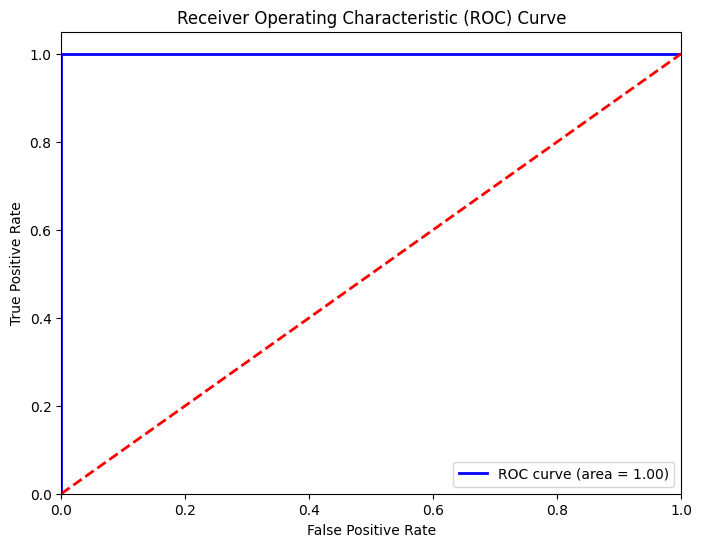

In [175]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probabilities)
roc_auc = roc_auc_score(y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [176]:
import pickle
pickle.dump(model, open("bankruptcy.pkl", "wb"))



LogisticRegression()